<a href="https://colab.research.google.com/github/mespealva/DesafioPythoAlura/blob/main/desafiopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



## Facturacion total por tienda

In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# LEER CSV CON URLLIB

def leer_csv(url):
    precios = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            precios.append(fila)
    return precios
total = leer_csv(url)
print(total)

[{'Producto': 'Lavavajillas', 'Categoría del Producto': 'Electrodomésticos', 'Precio': '1084800.0', 'Costo de envío': '56000.0', 'Fecha de Compra': '11/11/2022', 'Vendedor': 'Rafael Acosta', 'Lugar de Compra': 'Bogotá', 'Calificación': '4', 'Método de pago': 'Tarjeta de crédito', 'Cantidad de cuotas': '3', 'lat': '4.60971', 'lon': '-74.08175'}, {'Producto': 'Cama box', 'Categoría del Producto': 'Muebles', 'Precio': '473800.0', 'Costo de envío': '25400.0', 'Fecha de Compra': '03/01/2020', 'Vendedor': 'Izabela de León', 'Lugar de Compra': 'Cúcuta', 'Calificación': '5', 'Método de pago': 'Tarjeta de crédito', 'Cantidad de cuotas': '2', 'lat': '7.89391', 'lon': '-72.50782'}, {'Producto': 'Balón de baloncesto', 'Categoría del Producto': 'Deportes y diversión', 'Precio': '23700.0', 'Costo de envío': '0.0', 'Fecha de Compra': '25/12/2022', 'Vendedor': 'Maria Alfonso', 'Lugar de Compra': 'Medellín', 'Calificación': '5', 'Método de pago': 'Nequi', 'Cantidad de cuotas': '1', 'lat': '6.25184', 'l

In [ ]:
total_ventas = 0
totales= []
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    total_tienda = 0


    for venta in datos_tienda:
        precio = float(venta['Precio'])  # Solo sumamos el precio
        total_tienda += precio

    print(f"Facturación Tienda {i+1}: ${total_tienda:.2f}")
    factura = total_tienda
    totales.append(factura)
    total_ventas += total_tienda

# Mostrar facturación total
print(f"\nFacturación total de todas las tiendas: ${total_ventas:.2f}")


Facturación Tienda 1: $1038375700.00
Facturación Tienda 2: $1116343500.00
Facturación Tienda 3: $1098019600.00
Facturación Tienda 4: $1038375700.00

Facturación total de todas las tiendas: $4291114500.00



La tienda con menos ventas es 4, con 1038375700.0 y la tienda con mas ventas es la 1, con 1150880400.0


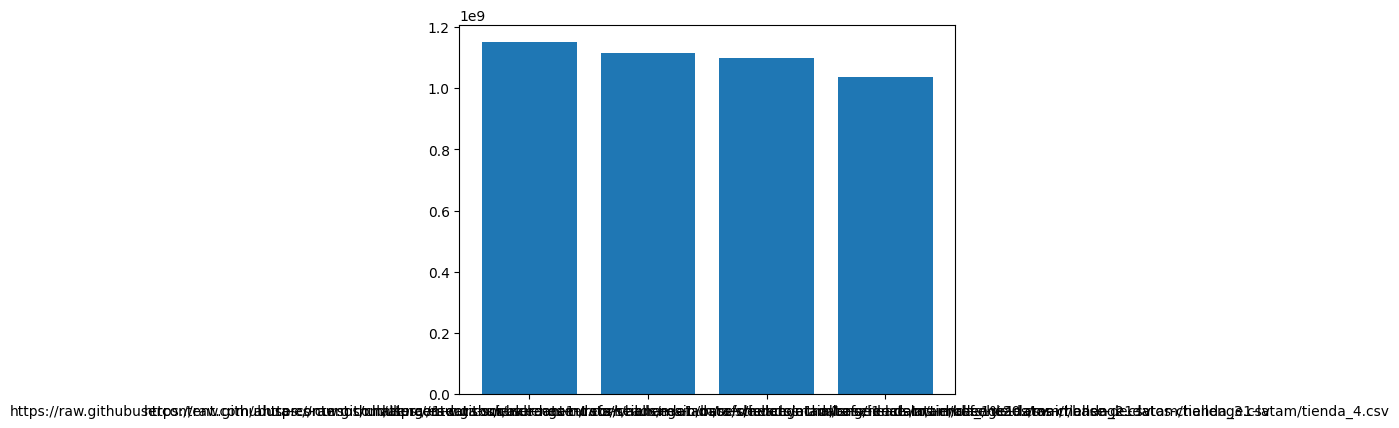

In [ ]:
import matplotlib.pyplot as plt

plt.bar(urls,totales)


maximo = max(totales)
indicemax = totales.index(maximo)+1
minimo = min(totales)
indicemin = totales.index(minimo)+1
print(f"\nLa tienda con menos ventas es {indicemin}, con {minimo} y la tienda con mas ventas es la {indicemax}, con {maximo}")

# 2. Ventas por categoría

## Categorias más importantes

In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]
def leer_csv(url):
  datos = []
  with urlopen(url) as respuesta:
      lineas = respuesta.read().decode('utf-8').splitlines()
      reader = csv.DictReader(lineas)

      for fila in reader:
            datos.append(fila)

  return datos

ventas_por_categoria = {}
maximos =[]
print("Ventas por categoria:")
for i, url in enumerate(urls):
    datos_tienda = leer_csv(url)
    print(f"\nTienda {i+1}:")

    categorias_tienda = {}

    for venta in datos_tienda:
        categoria = venta['Categoría del Producto']
        precio = float(venta['Precio'])
        cantidad = int(venta['Cantidad de cuotas'])
        monto_venta = precio * cantidad

        if categoria in categorias_tienda:
            categorias_tienda[categoria] += monto_venta
        else:
            categorias_tienda[categoria] = monto_venta

        if categoria in ventas_por_categoria:
            ventas_por_categoria[categoria] += monto_venta
        else:
            ventas_por_categoria[categoria] = monto_venta

    maximo = max(ventas_por_categoria.values())
    maximos.append(maximo)

    for categoria, monto in categorias_tienda.items():
      print(f"  {categoria}: ${monto:.2f}")
    print(f'La categoria con mayores ingresos es {list(ventas_por_categoria.keys())[list(ventas_por_categoria.values()).index(maximo)]} con ${maximo} en ventas en esta tienda')


print("\nVentas totales por categoría (todas las tiendas):")
for categoria, monto in ventas_por_categoria.items():
    print(f"  {categoria}: ${monto:.2f}")


total_general = sum(ventas_por_categoria.values())

print(f"\nTotal general de ventas: ${total_general:.2f}")

Ventas por categoria:

Tienda 1:
  Electrodomésticos: $879089600.00
  Muebles: $556628000.00
  Deportes y diversión: $100062000.00
  Libros: $29543400.00
  Electrónicos: $1211446500.00
  Instrumentos musicales: $222837200.00
  Juguetes: $54641200.00
  Artículos para el hogar: $44579300.00
La categoria con mayores ingresos es Electrónicos con $1211446500.0 en ventas en esta tienda

Tienda 2:
  Muebles: $527332100.00
  Instrumentos musicales: $294448700.00
  Deportes y diversión: $81660600.00
  Electrónicos: $1286643600.00
  Artículos para el hogar: $42739700.00
  Juguetes: $46721200.00
  Electrodomésticos: $1026226300.00
  Libros: $31417000.00
La categoria con mayores ingresos es Electrónicos con $2498090100.0 en ventas en esta tienda

Tienda 3:
  Electrodomésticos: $1081380800.00
  Muebles: $555092500.00
  Instrumentos musicales: $250336000.00
  Deportes y diversión: $123399200.00
  Electrónicos: $1101334500.00
  Juguetes: $61190400.00
  Artículos para el hogar: $44724600.00
  Libros: 

In [ ]:
# sabiendo, con la informacion anterior, que la categoria mas vendida en todas las tiendas es electronicos
# calculo el total de ventas de esta categoria sumando todas las tiendas

print(f'El total de ventas de electronicos sumando todas las tiendas es ${sum(maximos)}')

El total de ventas de electronicos sumando todas las tiendas es $12119832300.0


# 3. Calificación promedio de la tienda


In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos
ranking = {}

def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    ranking[numero]= [promedio]
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


In [ ]:
maximo = max(ranking.values())
print(f'La tienda con mejores evaluaciones es la tienda {list(ranking.keys())[list(ranking.values()).index(maximo)]}')

La tienda con mejores evaluaciones es la tienda 3


# 4. Productos más y menos vendidos

In [ ]:
import itertools
tiendas = [tienda, tienda2, tienda3, tienda4]

def conteo(sucursales):
    for i, tienda in enumerate(sucursales):
        print(f"\nTienda {i + 1}")
        conteo_productos = tienda['Producto'].value_counts()
        productos = conteo_productos.to_dict()
        total = len(productos)
        print("\nLos productos mas vendidos son: ")

        for clave, valor in itertools.islice(productos.items(), 3):
            print(f'   {clave}: {valor} unidades vendidas')
        print("Los productos menos vendidos son: ")
        for clave, valor in itertools.islice(productos.items(), (total - 3), total):
            print(f'   {clave}: {valor} unidades vendidas')

conteo(tiendas)



Tienda 1

Los productos mas vendidos son: 
   Microondas: 60 unidades vendidas
   TV LED UHD 4K: 60 unidades vendidas
   Armario: 60 unidades vendidas
Los productos menos vendidos son: 
   Olla de presión: 35 unidades vendidas
   Auriculares con micrófono: 33 unidades vendidas
   Celular ABXY: 33 unidades vendidas

Tienda 2

Los productos mas vendidos son: 
   Iniciando en programación: 65 unidades vendidas
   Microondas: 62 unidades vendidas
   Batería: 61 unidades vendidas
Los productos menos vendidos son: 
   Mesa de comedor: 34 unidades vendidas
   Impresora: 34 unidades vendidas
   Juego de mesa: 32 unidades vendidas

Tienda 3

Los productos mas vendidos son: 
   Kit de bancas: 57 unidades vendidas
   Mesa de comedor: 56 unidades vendidas
   Cama king: 56 unidades vendidas
Los productos menos vendidos son: 
   Mochila: 36 unidades vendidas
   Microondas: 36 unidades vendidas
   Bloques de construcción: 35 unidades vendidas

Tienda 4

Los productos mas vendidos son: 
   Cama box: 

# 5. Envío promedio por tienda

In [ ]:
def calcular_envio_promedio(datos_tienda, tienda_numero):
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0

    print(f"Tienda {tienda_numero} - Envío promedio: ${promedio_envio:.2f}")

# Procesar todas las tiendas
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    calcular_envio_promedio(datos_tienda, i)

Tienda 1 - Envío promedio: $23459.46
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


# Vizualizacion